# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [30]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

In [31]:
x = np.arange(0, 27)
def fun(theta, X, y) :
    m, n = X.shape
    theta = np.reshape(theta, [n, -1]) 
    prediccion = X @ theta
    costo = (y - prediccion).T @ (y - prediccion)
    return costo[0][0]

m = len(data)
ones = np.ones([m, 1])
x = np.reshape(x, [m, -1])
x2 = x**2
x3 = x**3
theta0 = np.random.rand(2)
y = np.reshape(data, [m, -1])

import scipy.optimize as opt
X1 = np.hstack((ones, x))
sol = opt.minimize(fun,
                   theta0,
                   args=(X1, y))
theta_sol1 = sol.x
cost_sol1 = sol.fun
theta_sol1

array([9.11567634, 0.18667055])

In [32]:
X2 = np.hstack((ones, x, x2))
theta0 = np.random.rand(3)
sol = opt.minimize(fun,
                   theta0,
                   args=(X2, y))
theta_sol2 = sol.x
cost_sol2 = sol.fun
theta_sol2

array([9.59128645e+00, 7.25241267e-02, 4.39024725e-03])

In [33]:
X3 = np.hstack((ones, x, x2, x3))
theta0 = np.random.rand(4)
sol = opt.minimize(fun,
                   theta0,
                   args=(X3, y))
theta_sol3 = sol.x
cost_sol3 = sol.fun
theta_sol3

array([9.56752295e+00, 8.46495951e-02, 3.20207355e-03, 3.04659879e-05])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

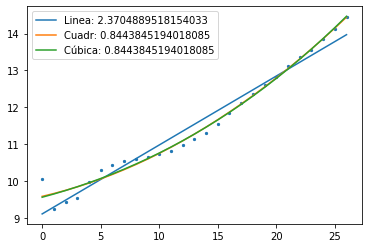

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, data, s=5)
plt.plot(x, X1 @ theta_sol1, label="Linea: " + str(cost_sol1))
plt.plot(x, X2 @ theta_sol2, label="Cuadr: " + str(cost_sol2))
plt.plot(x, X3 @ theta_sol3, label="Cúbica: " + str(cost_sol2))
plt.legend(loc="best")

In [30]:
sol?

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [35]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('population_data.csv')
data.head(5)

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752


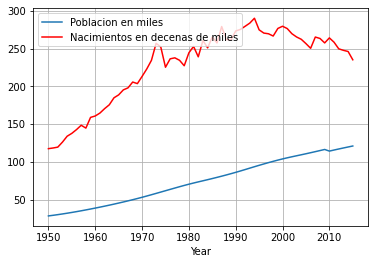

In [36]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

In [37]:
y = np.array(data["Poblacion"])/1000
type(y)

numpy.ndarray

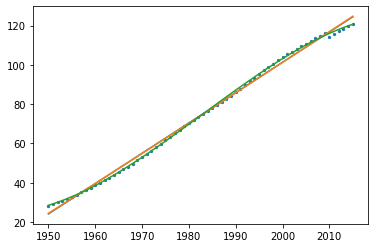

In [41]:
m = len(data)


x = np.array(data["Year"] - np.min(data["Year"]))
y = np.array(data["Poblacion"])/1000
ones = np.ones([m, 1])
x = np.reshape(x, [m, -1])
x2 = x**2
x3 = x**3

y = np.reshape(y, [m, -1])


def funcion_de_costo(theta, X, y) :
    m, n = X.shape
    theta = np.reshape(theta, [n, -1]) 
    prediccion = X @ theta
    costo = (y - prediccion).T @ (y - prediccion)
    return costo[0][0]

X1 = np.hstack((ones, x))
X2 = np.hstack((ones, x, x2))
X3 = np.hstack((ones, x, x2, x3))

t1 = np.random.rand(2)
t2 = np.random.rand(3)
t3 = np.random.rand(4)

sol1 = opt.minimize(funcion_de_costo, t1, args=(X1, y))
sol2 = opt.minimize(funcion_de_costo, t2, args=(X2, y))
sol3 = opt.minimize(funcion_de_costo, t3, args=(X3, y))

plt.figure()
plt.scatter(x + np.min(data["Year"]), y, s=5)
plt.plot(x + np.min(data["Year"]), X1 @ sol1.x)
plt.plot(x + np.min(data["Year"]), X2 @ sol2.x)
plt.plot(x + np.min(data["Year"]), X3 @ sol3.x)


In [39]:
sol1.x

array([24.13801678,  1.54397338])

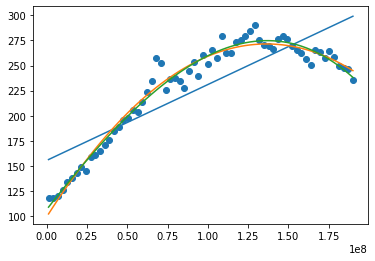

In [42]:
y = np.array(data["Nacimientos"])/10000
y = np.reshape(y, [m, -1])
def funcion_de_costo(theta, X, y) :
    m, n = X.shape
    theta = np.reshape(theta, [n, -1]) 
    prediccion = X @ theta
    costo = (y - prediccion).T @ (y - prediccion)
    return costo[0][0]

X1 = np.hstack((ones, x))
X2 = np.hstack((ones, x, x2))
X3 = np.hstack((ones, x, x2, x3))

t1 = np.random.rand(2)
t2 = np.random.rand(3)
t3 = np.random.rand(4)

sol1 = opt.minimize(funcion_de_costo, t1, args=(X1, y))
sol2 = opt.minimize(funcion_de_costo, t2, args=(X2, y))
sol3 = opt.minimize(funcion_de_costo, t3, args=(X3, y))

plt.figure()
plt.scatter(x*np.max(data["Nacimientos"]) + np.min(data["Nacimientos"]), y)
plt.plot(x*np.max(data["Nacimientos"]) + np.min(data["Nacimientos"]), X1 @ sol1.x)
plt.plot(x*np.max(data["Nacimientos"]) + np.min(data["Nacimientos"]), X2 @ sol2.x)
plt.plot(x*np.max(data["Nacimientos"]) + np.min(data["Nacimientos"]), X3 @ sol3.x)